In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [21]:
data = {
    'title': ['Movie1', 'Movie2', 'Movie3', 'Movie4'],
    'genre': ['Action', 'Comedy', 'Action', 'Drama'],
    'director': ['Director1', 'Director2', 'Director1', 'Director3'],
    'actors': ['Actor1, Actor2', 'Actor3, Actor4', 'Actor1, Actor4', 'Actor2, Actor3'],
    'rating': [7.8, 6.5, 8.0, 7.0]
}

In [22]:
df = pd.DataFrame(data)
print(df)

    title   genre   director          actors  rating
0  Movie1  Action  Director1  Actor1, Actor2     7.8
1  Movie2  Comedy  Director2  Actor3, Actor4     6.5
2  Movie3  Action  Director1  Actor1, Actor4     8.0
3  Movie4   Drama  Director3  Actor2, Actor3     7.0


In [23]:
df.fillna(method='ffill', inplace=True)


categorical_features = ['genre', 'director', 'actors']
numerical_features = []


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ])


<ipython-input-23-b1b28fd016cc>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [28]:
X = df.drop(columns='rating')
y = df['rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [27]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.9819008264462815
R^2 Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


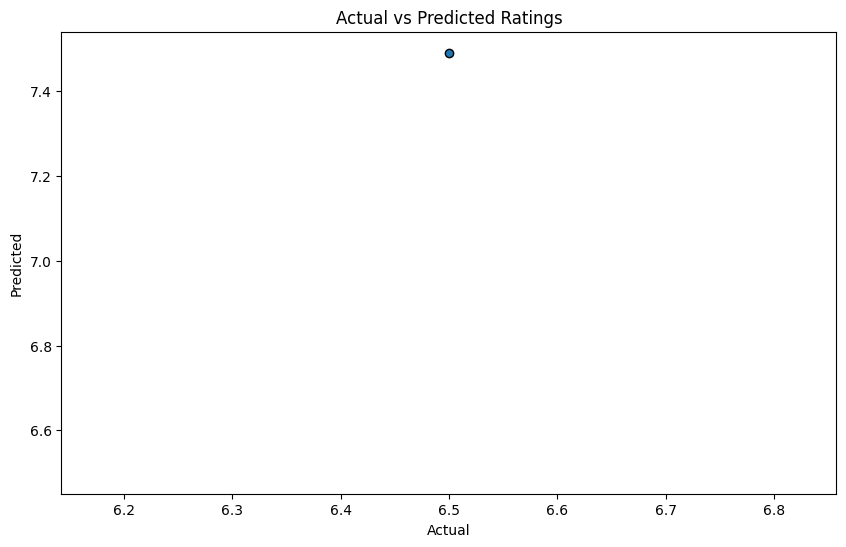

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Ratings')
plt.show()
